<a href="https://colab.research.google.com/github/rhutikcodes/weather-prediction-ml-model-analysis/blob/main/Nagpur_rainfall_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install plotly

In [ ]:
import warnings

warnings.filterwarnings('ignore')

# 1. Import Necessary Libraries


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Problem Statement



# 3. Loading Dataset
We will first load and import the dataset to work with

In [ ]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/rhutikcodes/weather-prediction-ml-model-analysis/main/Nagpur_dataset%20-%20foo2014-2022.csv')
df = df_raw

# 4. Exploratory Data Analysis with Visualisation
In this step, we would analyze the data set, learn the statistics and correlation between different features

In [ ]:
df_raw

,date,location,valid_time_gmt,month,time,(Day/Night),temperature,condition,dewPoint,heat_index,...,wdirection,wdir_cardinal,gust,wspd,uv_desc,feels_like,uv_index,clds,rain,Rain Today
0,20140102.0,Nagpur/Sonegaon,1.388602e+09,January,6:40 PM,N,63.0,Fair,54.0,63.0,...,350.0,N,0.0,5.0,Low,63.0,0.0,CLR,False,No
1,20140102.0,Nagpur/Sonegaon,1.388605e+09,January,7:40 PM,N,63.0,Fair,52.0,63.0,...,20.0,NNE,0.0,2.0,Low,63.0,0.0,CLR,False,No
2,20140102.0,Nagpur/Sonegaon,1.388609e+09,January,8:40 PM,N,61.0,Fair,52.0,61.0,...,NaN,CALM,0.0,NaN,Low,61.0,0.0,CLR,False,No
3,20140102.0,Nagpur/Sonegaon,1.388612e+09,January,9:40 PM,N,61.0,Fair,54.0,61.0,...,NaN,CALM,0.0,NaN,Low,61.0,0.0,CLR,False,No
4,20140102.0,Nagpur/Sonegaon,1.388616e+09,January,10:40 PM,N,55.0,Fair,50.0,55.0,...,NaN,CALM,0.0,NaN,Low,55.0,0.0,CLR,False,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113028,20220426.0,Nagpur,1.650992e+09,April,5:00 PM,N,91.0,Haze,52.0,89.0,...,NaN,CALM,0.0,0.0,Low,89.0,0.0,SCT,False,No
113029,20220426.0,Nagpur,1.650994e+09,April,5:30 PM,N,90.0,Haze,50.0,87.0,...,NaN,CALM,0.0,0.0,Low,87.0,0.0,SCT,False,No
113030,20220426.0,Nagpur,1.650996e+09,April,6:00 PM,N,88.0,Haze,50.0,85.0,...,NaN,CALM,0.0,0.0,Low,85.0,0.0,SCT,False,No
113031,NaN,NaN,NaN,January,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_raw.shape

(113033, 24)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113033 entries, 0 to 113032
Data columns (total 24 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   date            113031 non-null  float64
 1   location        113031 non-null  object 
 2   valid_time_gmt  113031 non-null  float64
 3   month           113033 non-null  object 
 4   time            113031 non-null  object 
 5   (Day/Night)     113031 non-null  object 
 6   temperature     112852 non-null  float64
 7   condition       113031 non-null  object 
 8   dewPoint        112849 non-null  float64
 9   heat_index      112814 non-null  float64
 10  humidity %      112814 non-null  float64
 11  pressure        112714 non-null  float64
 12  visibility      113031 non-null  float64
 13  windchill       112441 non-null  float64
 14  wdirection      86008 non-null   float64
 15  wdir_cardinal   112603 non-null  object 
 16  gust            113031 non-null  float64
 17  wspd      

In [ ]:
df['Rain Today']

0          No
1          No
2          No
3          No
4          No
         ... 
113028     No
113029     No
113030     No
113031    NaN
113032    NaN
Name: Rain Today, Length: 113033, dtype: object

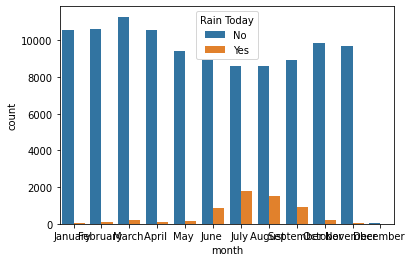

In [ ]:
sns.countplot(x ='month', hue = "Rain Today", data = df)
 

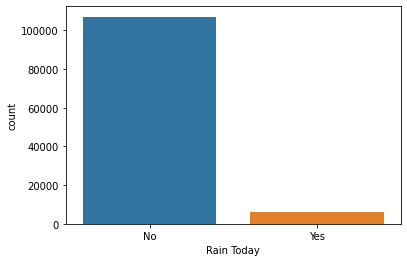

In [ ]:
sns.countplot('Rain Today',data=df)


Lets look at the basic statistics of the data





In [ ]:
df_raw.describe()

,date,valid_time_gmt,temperature,dewPoint,heat_index,humidity %,pressure,visibility,windchill,wdirection,gust,wspd,feels_like,uv_index
count,1.130310e+05,1.130310e+05,112852.000000,112849.000000,112814.000000,112814.000000,112714.000000,113031.000000,112441.000000,86008.000000,113031.000000,111967.000000,112834.000000,113003.000000
mean,2.017861e+07,1.522532e+09,82.239881,62.290326,84.214202,57.732391,28.721798,1.837339,82.246165,195.807657,0.121144,3.987389,84.210743,1.399237
std,2.331687e+04,7.337235e+07,11.308303,11.925127,12.395541,25.597053,0.176265,0.878892,11.310467,107.766269,1.713177,5.032238,12.397733,14.445843
min,2.014010e+07,1.388515e+09,37.000000,16.000000,43.000000,2.000000,0.090000,0.000000,33.000000,3.000000,0.000000,0.000000,33.000000,-507.000000
25%,2.016043e+07,1.461974e+09,75.000000,54.000000,75.000000,36.000000,28.600000,1.000000,75.000000,90.000000,0.000000,2.000000,75.000000,0.000000
50%,2.018042e+07,1.524123e+09,81.000000,63.000000,83.000000,59.000000,28.720000,2.000000,81.000000,220.000000,0.000000,3.000000,83.000000,0.000000
75%,2.020030e+07,1.583265e+09,90.000000,73.000000,93.000000,79.000000,28.860000,3.000000,90.000000,290.000000,0.000000,6.000000,93.000000,4.000000
max,2.022043e+07,1.650996e+09,207.000000,104.000000,184.000000,100.000000,29.710000,6.000000,207.000000,390.000000,40.000000,725.000000,184.000000,14.000000


In [ ]:
#size of data... there are 3.345.580 of elements
df_raw.size

2712792

In [ ]:
# Identification all column listed
df_raw.columns

Index(['date', 'location', 'valid_time_gmt', 'month', 'time', '(Day/Night)',
       'temperature', 'condition', 'dewPoint', 'heat_index', 'humidity %',
       'pressure', 'visibility', 'windchill', 'wdirection', 'wdir_cardinal',
       'gust', 'wspd', 'uv_desc', 'feels_like', 'uv_index', 'clds', 'rain',
       'Rain Today'],
      dtype='object')

**Identify Data Categorical values**

In [ ]:
# Checking data categorical
# print("location :", df_raw['Location'].unique())
# print("WindGustDir :", df_raw['WindGustDir'].unique())
# print("WindDir9am :", df_raw['WindDir9am'].unique())
# print("WindDir3pm :", df_raw['WindDir3pm'].unique())
# print("RainToday :", df_raw['RainToday'].unique())
# print("RainTomorrow :", df_raw['RainTomorrow'].unique())

In [ ]:
# Checking the label counts data categorical
# print("location :", df_raw['Location'].value_counts())
# print("WindGustDir :", df_raw['WindGustDir'].value_counts())
# print("WindDir9am :", df_raw['WindDir9am'].value_counts())
# print("WindDir3pm :", df_raw['WindDir3pm'].value_counts())
# print("RainToday :", df_raw['RainToday'].value_counts())
# print("RainTomorrow :", df_raw['RainTomorrow'].value_counts())

Dealing with invalid dataset

In [ ]:
x=df.iloc[:,[5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]].values
y=df.iloc[:,-1].values.reshape(-1,1) #slicing genrates new list
y.shape

(113033, 1)

In [ ]:
x,y

(array([['N', 63.0, 'Fair', ..., 63.0, 0.0, 'CLR'],
        ['N', 63.0, 'Fair', ..., 63.0, 0.0, 'CLR'],
        ['N', 61.0, 'Fair', ..., 61.0, 0.0, 'CLR'],
        ...,
        ['N', 88.0, 'Haze', ..., 85.0, 0.0, 'SCT'],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]], dtype=object), array([['No'],
        ['No'],
        ['No'],
        ...,
        ['No'],
        [nan],
        [nan]], dtype=object))

#### Dealing with invalid dataset

In [ ]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
x=imputer.fit_transform(x)
y=imputer.fit_transform(y)

In [ ]:
x

array([['N', 63.0, 'Fair', ..., 63.0, 0.0, 'CLR'],
       ['N', 63.0, 'Fair', ..., 63.0, 0.0, 'CLR'],
       ['N', 61.0, 'Fair', ..., 61.0, 0.0, 'CLR'],
       ...,
       ['N', 88.0, 'Haze', ..., 85.0, 0.0, 'SCT'],
       ['D', 77.0, 'Haze', ..., 78.0, 0.0, 'CLR'],
       ['D', 77.0, 'Haze', ..., 78.0, 0.0, 'CLR']], dtype=object)

In [ ]:
y

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le1=LabelEncoder()
x[:,0]=le1.fit_transform(x[:,0])
le2=LabelEncoder()
x[:,2]=le2.fit_transform(x[:,2])
le3=LabelEncoder()
x[:,10]=le3.fit_transform(x[:,10])
le4=LabelEncoder()
x[:,13]=le4.fit_transform(x[:,13])
le5=LabelEncoder()
x[:,16]=le5.fit_transform(x[:,16])
le6=LabelEncoder()
y=le6.fit_transform(y)

In [ ]:
x,y

(array([[1, 63.0, 5, ..., 63.0, 0.0, 1],
        [1, 63.0, 5, ..., 63.0, 0.0, 1],
        [1, 61.0, 5, ..., 61.0, 0.0, 1],
        ...,
        [1, 88.0, 8, ..., 85.0, 0.0, 4],
        [0, 77.0, 8, ..., 78.0, 0.0, 1],
        [0, 77.0, 8, ..., 78.0, 0.0, 1]], dtype=object),
 array([0, 0, 0, ..., 0, 0, 0]))

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

Splitting data

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train,y_train,x_test,y_test

(array([[-0.88979141, -1.25929707, -0.23494087, ..., -1.30754379,
         -0.09684834, -0.51676899],
        [ 1.12385891, -0.90535041, -0.23494087, ..., -0.98468966,
         -0.09684834, -0.51676899],
        [ 1.12385891, -0.10897044, -0.23494087, ..., -0.01612728,
         -0.09684834,  1.51304472],
        ...,
        [ 1.12385891,  0.15648956, -0.23494087, ..., -0.01612728,
         -0.09684834,  0.15983558],
        [ 1.12385891,  0.68740954, -0.23494087, ...,  0.87172157,
         -0.09684834,  1.51304472],
        [ 1.12385891, -0.90535041, -0.23494087, ..., -0.98468966,
         -0.09684834,  1.51304472]]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([[-0.88979141,  0.51043622, -0.23494087, ...,  0.9524351 ,
          0.45701947,  1.51304472],
        [ 1.12385891, -0.28594376, -0.5010871 , ..., -0.09684081,
         -0.09684834, -1.19337356],
        [-0.88979141,  0.77589621, -0.23494087, ...,  0.79100803,
          0.18008556,  1.51304472],
        ...,
        [ 1.12385891,

**Models**





1.Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=200,random_state=0)
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

In [ ]:
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)

Accuracy:  0.9994249568717654
Precision:  0.9974619289340102
Recall:  0.9915895710681245


**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier_logreg = LogisticRegression(solver='liblinear', random_state=0)
classifier_logreg.fit(x_train, y_train)
y_pred_LR = classifier_logreg.predict(x_test)


In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_LR)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_LR)
recall = recall_score(y_test, y_pred_LR)

In [ ]:
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)

Accuracy:  0.9656301145662848
Precision:  0.7373271889400922
Recall:  0.5382674516400336


**Naive** **Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbmodel = GaussianNB()
nbmodel.fit(x_train,y_train)
y_pred_nb = nbmodel.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_nb)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)

In [ ]:
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)

Accuracy:  0.8783120272481975
Precision:  0.28684497816593885
Recall:  0.8839360807401178


Support Vector Machine

In [ ]:
from sklearn.svm import SVC
svm_clf = SVC(kernel='linear')
svm_clf.fit(x_train,y_train)
y_pred_svm = svm_clf.predict(x_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_svm)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)

In [ ]:
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)

Accuracy:  0.9762462953952316
Precision:  0.7591414944356121
Recall:  0.8031959629941127


**Artificial Neural Network**

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [ ]:
ann_clf = tf.keras.models.Sequential()
ann_clf.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann_clf.add(tf.keras.layers.Dense(units=6,activation="relu"))
ann_clf.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
ann_clf.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
ann_clf.fit(x_train,y_train,batch_size=32,epochs = 100)

Epoch 1/100
2826/2826 [==============================] - 6s 2ms/step - loss: 0.0779 - accuracy: 0.9653
Epoch 2/100
2826/2826 [==============================] - 5s 2ms/step - loss: 0.0390 - accuracy: 0.9882
Epoch 3/100
2826/2826 [==============================] - 5s 2ms/step - loss: 0.0248 - accuracy: 0.9927
Epoch 4/100
2826/2826 [==============================] - 5s 2ms/step - loss: 0.0200 - accuracy: 0.9935
Epoch 5/100
2826/2826 [==============================] - 5s 2ms/step - loss: 0.0179 - accuracy: 0.9940
Epoch 6/100
2826/2826 [==============================] - 6s 2ms/step - loss: 0.0170 - accuracy: 0.9941
Epoch 7/100
2826/2826 [==============================] - 5s 2ms/step - loss: 0.0163 - accuracy: 0.9944
Epoch 8/100
2826/2826 [==============================] - 5s 2ms/step - loss: 0.0159 - accuracy: 0.9944
Epoch 9/100
2826/2826 [==============================] - 5s 2ms/step - loss: 0.0156 - accuracy: 0.9945
Epoch 10/100
2826/2826 [==============================] - 5s 2ms/step - l

In [ ]:
y_pred_ann = ann_clf.predict(x_test)

In [ ]:
y_pred_ann = (y_pred_ann > 0.5)

In [ ]:
y_pred_ann

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,y_pred_ann)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
precision = precision_score(y_test, y_pred_ann)
recall = recall_score(y_test, y_pred_ann)

In [ ]:
print('Accuracy: ',accuracy)
print('Precision: ',precision)
print('Recall: ',recall)

Accuracy:  0.9974344229663379
Precision:  0.9820971867007673
Recall:  0.9688814129520605
